In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import random_rotation, random_shear, random_shift, random_zoom


mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

print(np.shape(train_images),
np.shape(test_images),
np.shape(train_labels),
np.shape(test_labels))


Using TensorFlow backend.


9
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [2]:
tuple_inputsize = (28, 28, 1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

layer_list = [tf.keras.layers.Convolution2D(filters = 32, kernel_size = (3, 3),
                               padding = 'same',input_shape = tuple_inputsize,
                               kernel_initializer = 
                               tf.initializers.RandomNormal(mean = 0.0,
                                stddev = 0.05, seed = None),
                             bias_initializer=tf.initializers.constant(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Convolution2D(filters = 28 , kernel_size = (3, 3),
                               padding = 'same',input_shape = tuple_inputsize,
                               kernel_initializer = 
                               tf.initializers.RandomNormal(mean = 0.0,
                                stddev = 0.05, seed = None),
                             bias_initializer=tf.initializers.constant(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(686, activation=tf.nn.relu,
                           kernel_initializer = 
                               tf.initializers.RandomNormal(mean = 0.0,
                                stddev = 0.05, seed = None),
                             bias_initializer=tf.initializers.constant(0.001)),
              tf.keras.layers.Dense(686/2, activation=tf.nn.relu,
                                    kernel_initializer = 
                               tf.initializers.RandomNormal(mean = 0.0,
                                stddev = 0.05, seed = None),
                             bias_initializer=tf.initializers.constant(0.001)),
              tf.keras.layers.Dense(686/4, activation=tf.nn.relu,
                                    kernel_initializer = 
                               tf.initializers.RandomNormal(mean = 0.0,
                                stddev = 0.05, seed = None),
                             bias_initializer=tf.initializers.constant(0.001)),
              tf.keras.layers.Dense(10, activation = tf.nn.softmax)]

In [3]:
model = tf.keras.Sequential(layer_list)

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs = 10,
          validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.4015 - accuracy: 0.8524 - val_loss: 0.3261 - val_accuracy: 0.8807
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2666 - accuracy: 0.9029 - val_loss: 0.2742 - val_accuracy: 0.8998
Epoch 3/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.2188 - accuracy: 0.9201 - val_loss: 0.2702 - val_accuracy: 0.9031
Epoch 4/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.1828 - accuracy: 0.9312 - val_loss: 0.2585 - val_accuracy: 0.9074
Epoch 5/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.1540 - accuracy: 0.9419 - val_loss: 0.2786 - val_accuracy: 0.9084
Epoch 6/10
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.1290 - accuracy: 0.9524 - val_loss: 0.2916 - val_accuracy: 0.9155
Epoch 7/10
60000/60000 [==============================] 

In [7]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 317us/sample - loss: 0.4144 - accuracy: 0.9134


[0.4144142249003053, 0.9134]

In [8]:
model.predict(test_images)

array([[4.8414950e-13, 3.2760941e-17, 1.0296863e-16, ..., 2.5617558e-07,
        5.9917246e-13, 9.9999976e-01],
       [6.2265275e-16, 2.8861715e-26, 1.0000000e+00, ..., 0.0000000e+00,
        1.9906258e-24, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.0390905e-14, 5.0447773e-25, 1.8314093e-18, ..., 4.2079724e-23,
        1.0000000e+00, 7.8017018e-27],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.2664447e-34, 0.0000000e+00],
       [2.6730798e-10, 5.3720502e-15, 4.5762376e-09, ..., 3.6487231e-06,
        5.0003877e-09, 8.0925631e-09]], dtype=float32)

In [9]:
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 28)        8092      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 28)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1372)              0         
_________________________________________________________________
dense (Dense)                (None, 686)               941878    
_________________________________________________________________
dense_1 (Dense)              (None, 343)               2

In [10]:
import pandas as pd
classes=np.arange(0, 10, 1)
y_pred=model.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.cast` instead.


In [11]:
print(con_mat)

[[869   1  14   9   3   1  99   0   4   0]
 [  1 981   1   7   7   0   2   0   1   0]
 [ 20   1 881   4  32   0  62   0   0   0]
 [ 20   6  26 859  49   0  38   0   2   0]
 [  3   0  78   8 863   0  47   0   1   0]
 [  0   0   1   0   0 989   0   9   0   1]
 [ 92   2  43  11  72   0 778   0   2   0]
 [  0   0   0   0   0  10   0 975   1  14]
 [  4   1   2   3   1   1   3   2 982   1]
 [  0   0   0   0   0   8   1  34   0 957]]


In [12]:
import sklearn.metrics as metrics

confusion_matrix = metrics.confusion_matrix(y_true=test_labels, y_pred=y_pred) 

In [13]:
confusion_matrix

array([[869,   1,  14,   9,   3,   1,  99,   0,   4,   0],
       [  1, 981,   1,   7,   7,   0,   2,   0,   1,   0],
       [ 20,   1, 881,   4,  32,   0,  62,   0,   0,   0],
       [ 20,   6,  26, 859,  49,   0,  38,   0,   2,   0],
       [  3,   0,  78,   8, 863,   0,  47,   0,   1,   0],
       [  0,   0,   1,   0,   0, 989,   0,   9,   0,   1],
       [ 92,   2,  43,  11,  72,   0, 778,   0,   2,   0],
       [  0,   0,   0,   0,   0,  10,   0, 975,   1,  14],
       [  4,   1,   2,   3,   1,   1,   3,   2, 982,   1],
       [  0,   0,   0,   0,   0,   8,   1,  34,   0, 957]], dtype=int64)

In [14]:
import keract
from DL_utils import train_CNN_keras,preprocess_image


Prediction on new test image is 	 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1506485e-11 1.0000000e+00]]


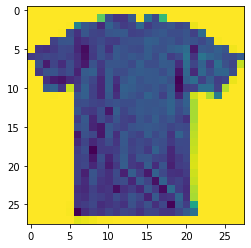

In [15]:
import cv2
image = cv2.imread('C://Soumick//Interpretability//testshirt.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow('Gray image', gray)
cv2.imwrite('C://Soumick//Interpretability//testshirt1.jpg', gray)
resize = cv2.resize(gray, (28,28))
new_image = np.reshape(resize, (1,28,28,1))
print('Prediction on new test image is \t' , model.predict(new_image))
plt.imshow(resize)


# Accuracy vs Val_accuracy growth plot

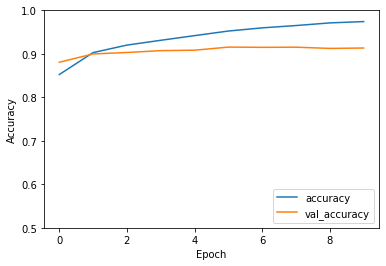

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
from keract import get_activations
activations = get_activations(model, new_image)

conv2d/BiasAdd:0 (1, 28, 28, 32) 


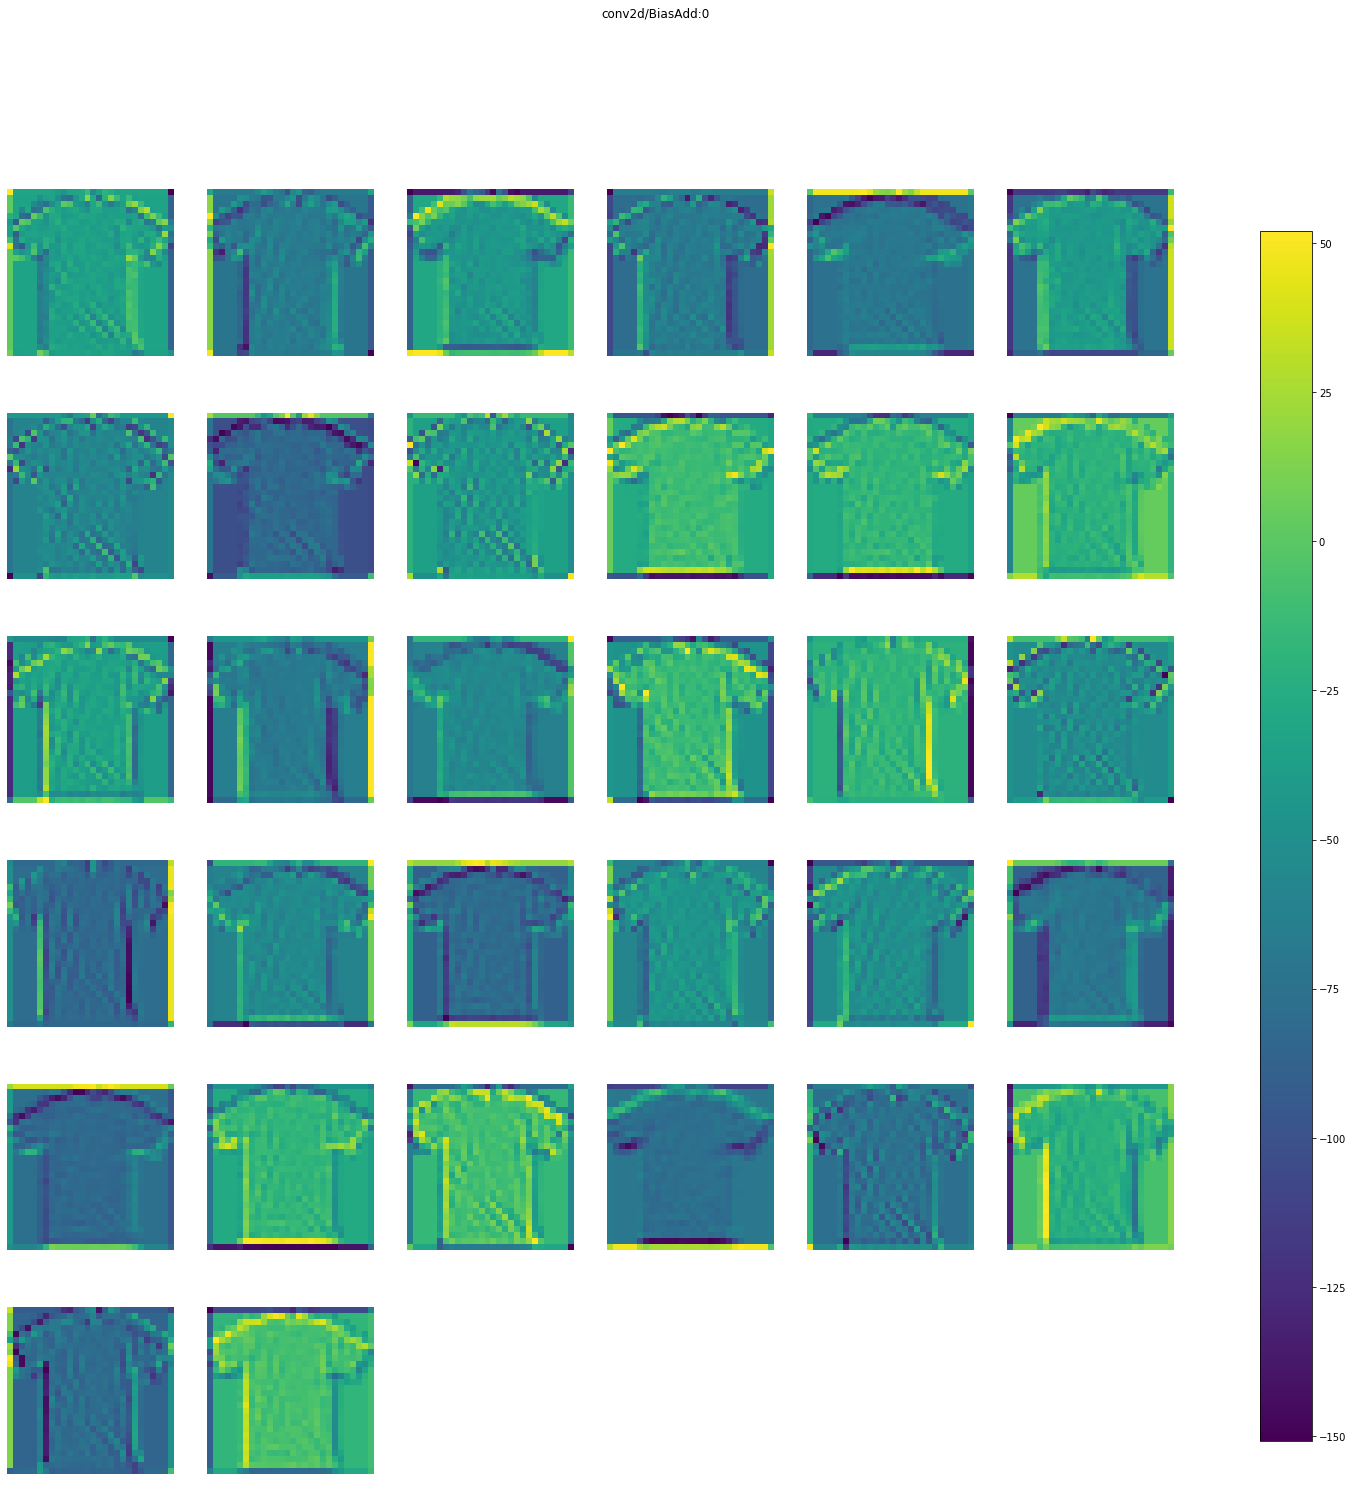

max_pooling2d/MaxPool:0 (1, 14, 14, 32) 


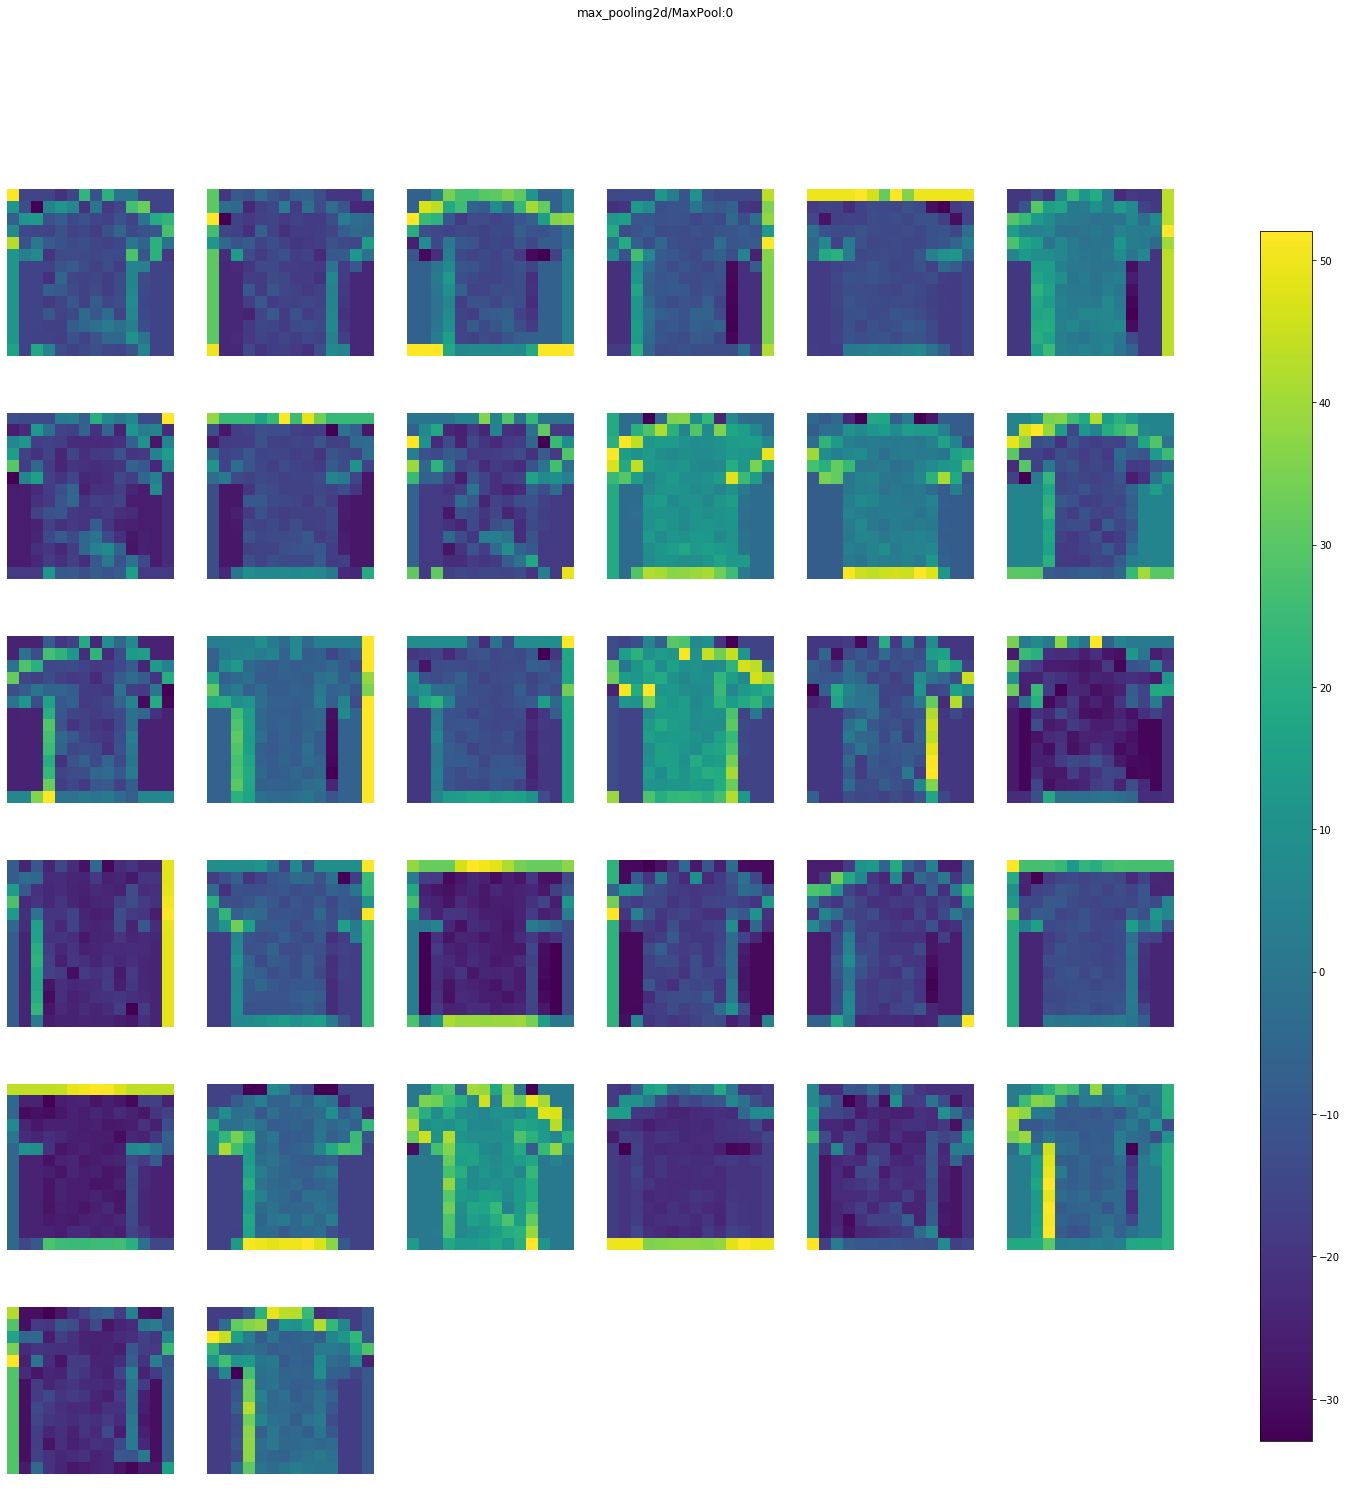

conv2d_1/BiasAdd:0 (1, 14, 14, 28) 


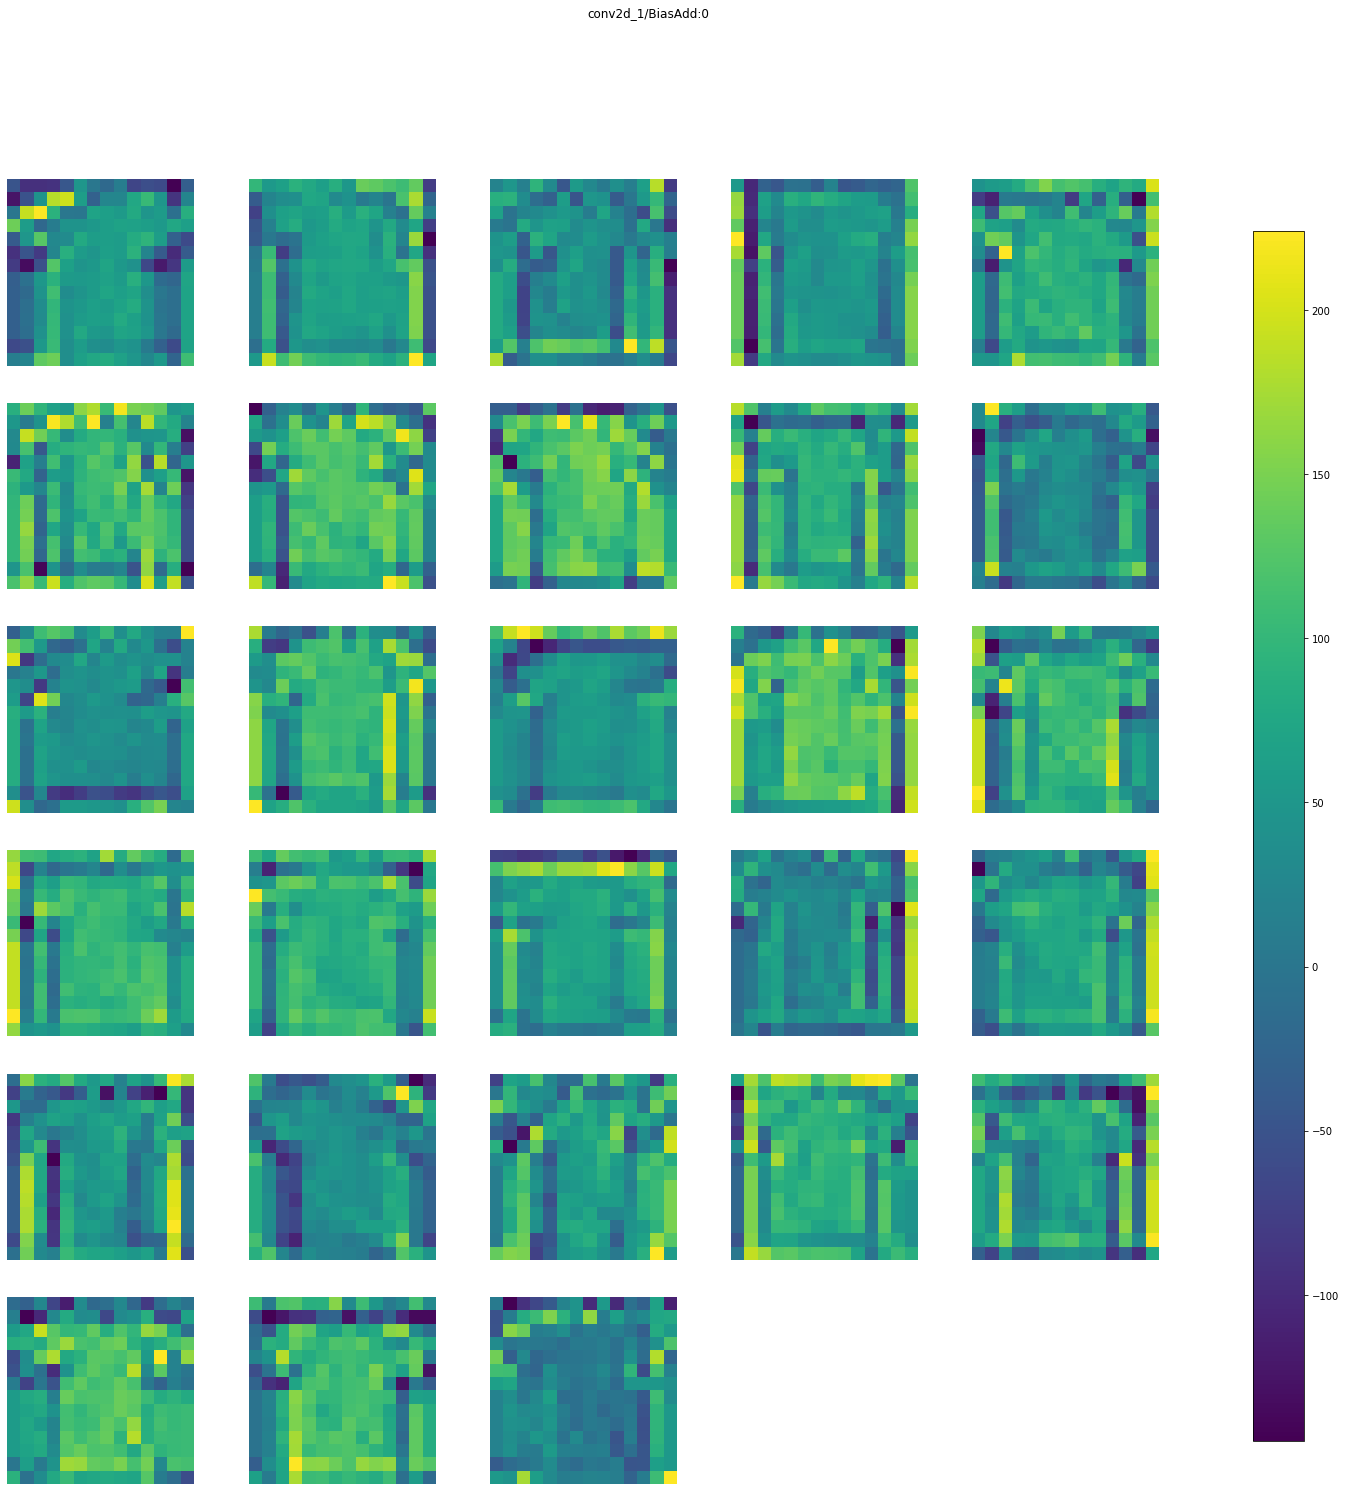

max_pooling2d_1/MaxPool:0 (1, 7, 7, 28) 


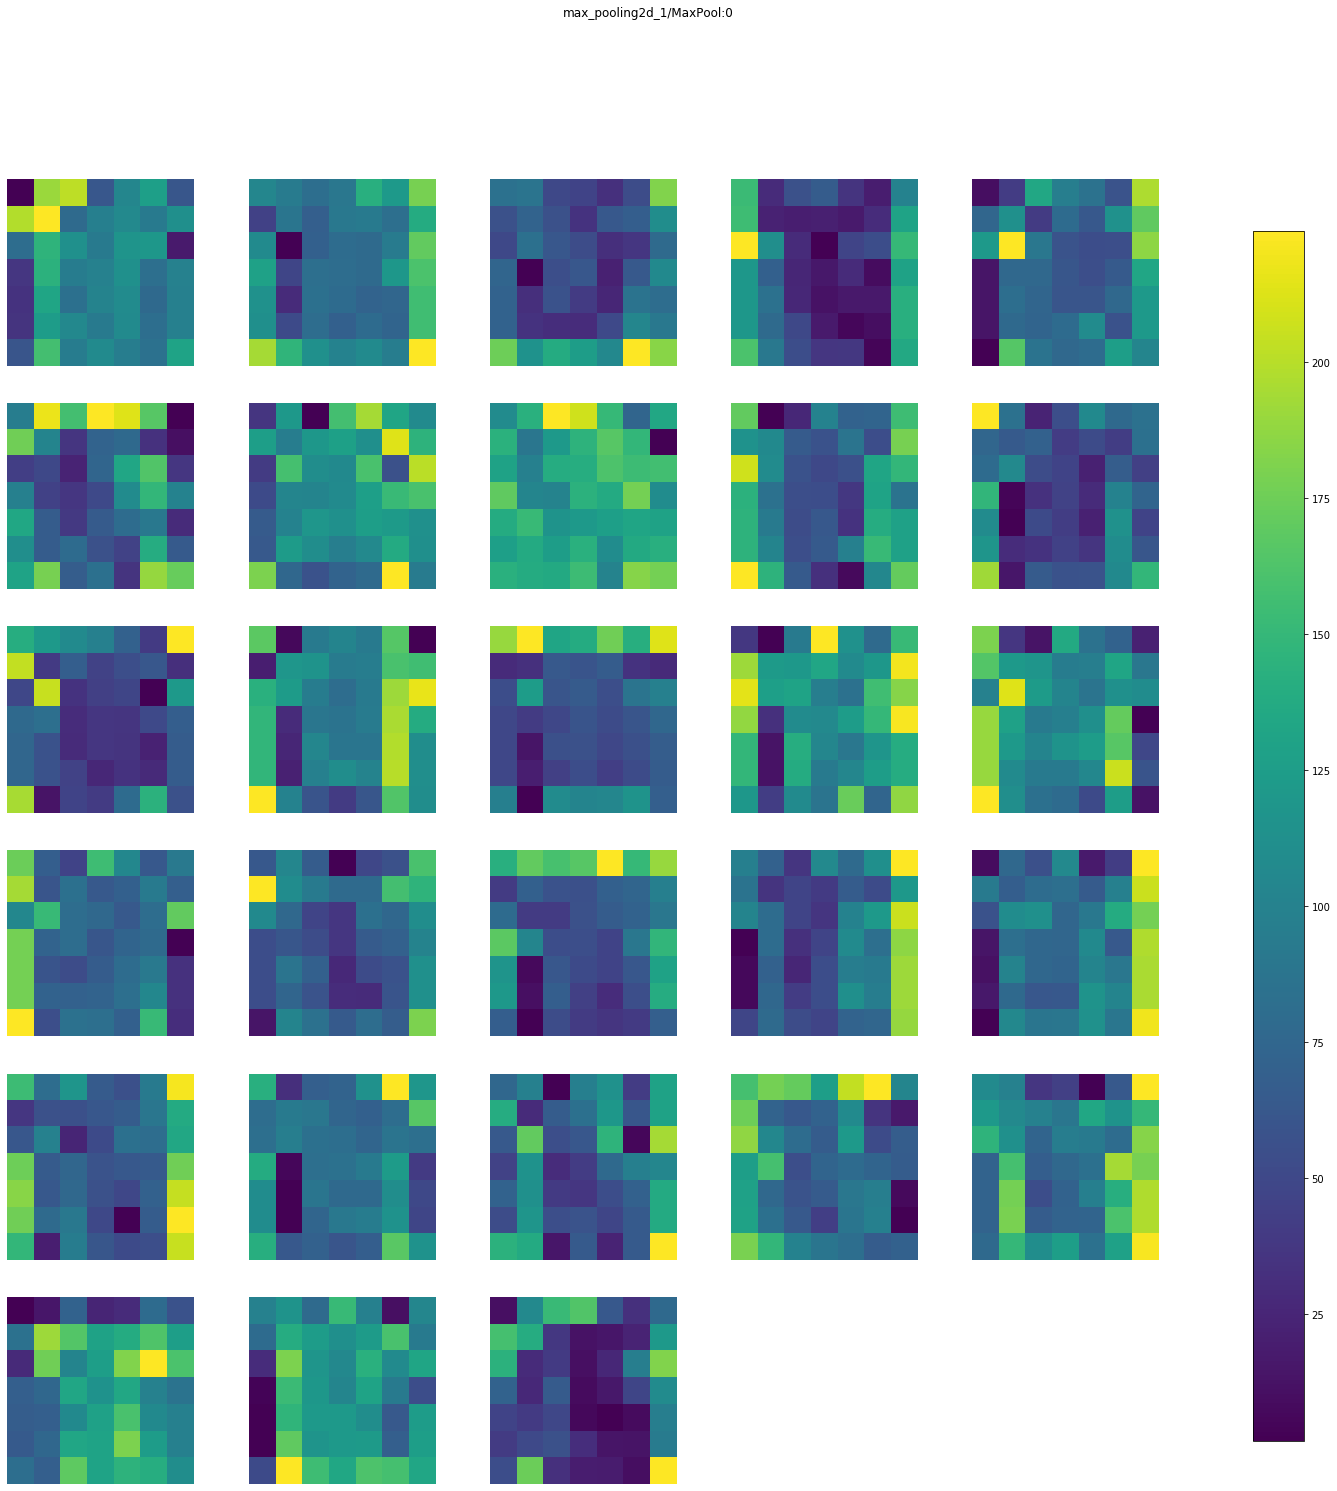

flatten/Reshape:0 (1, 1372) 


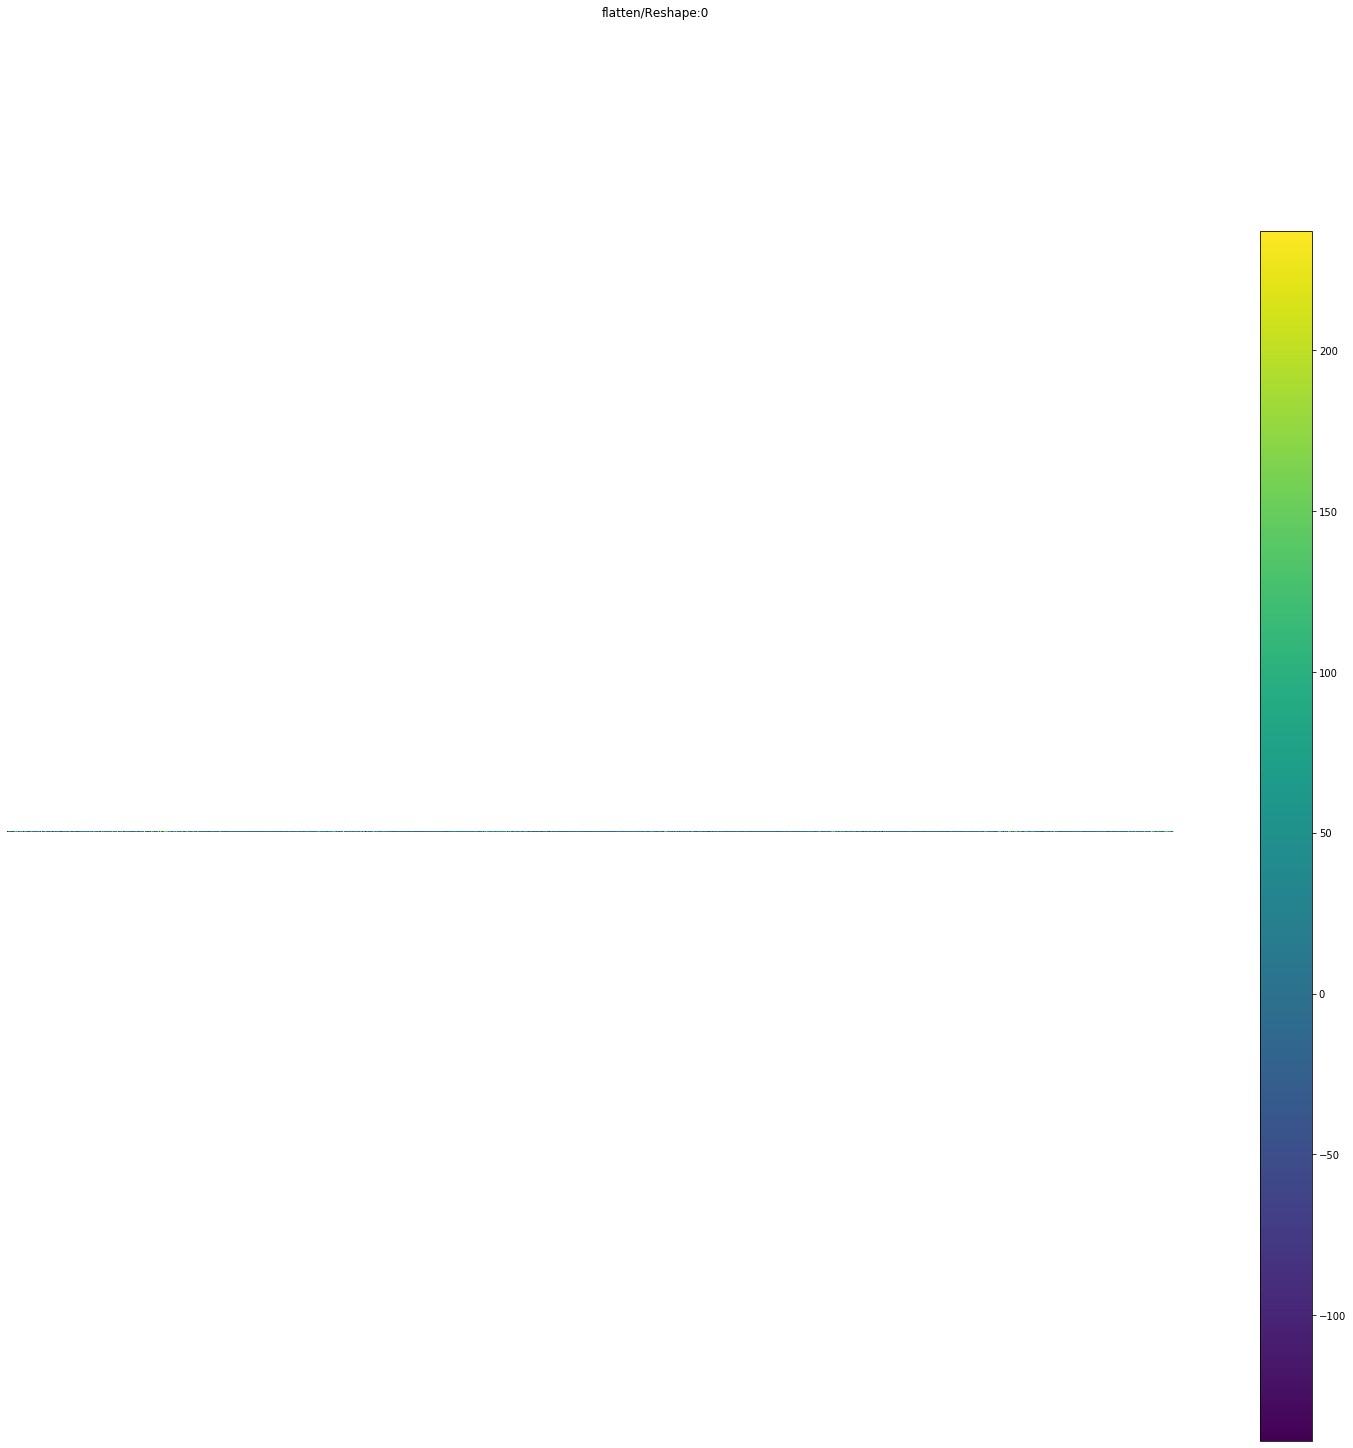

dense/Relu:0 (1, 686) 


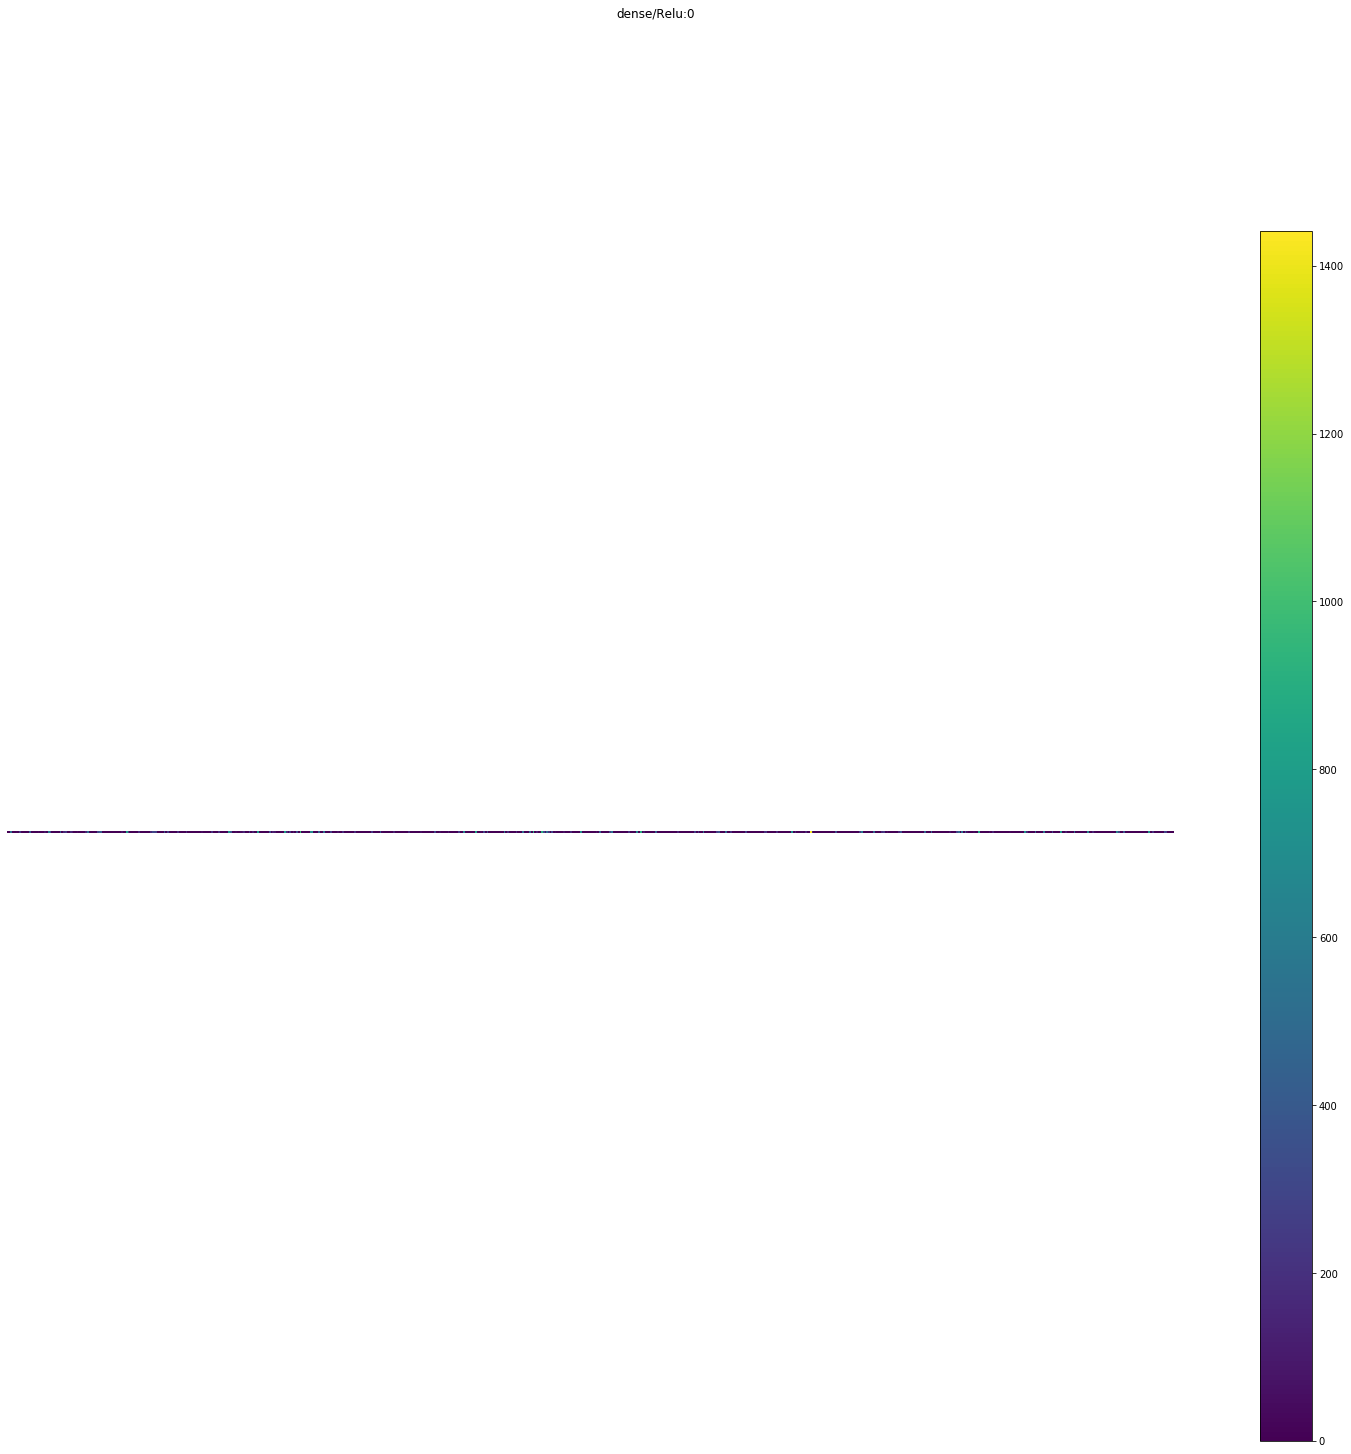

dense_1/Relu:0 (1, 343) 


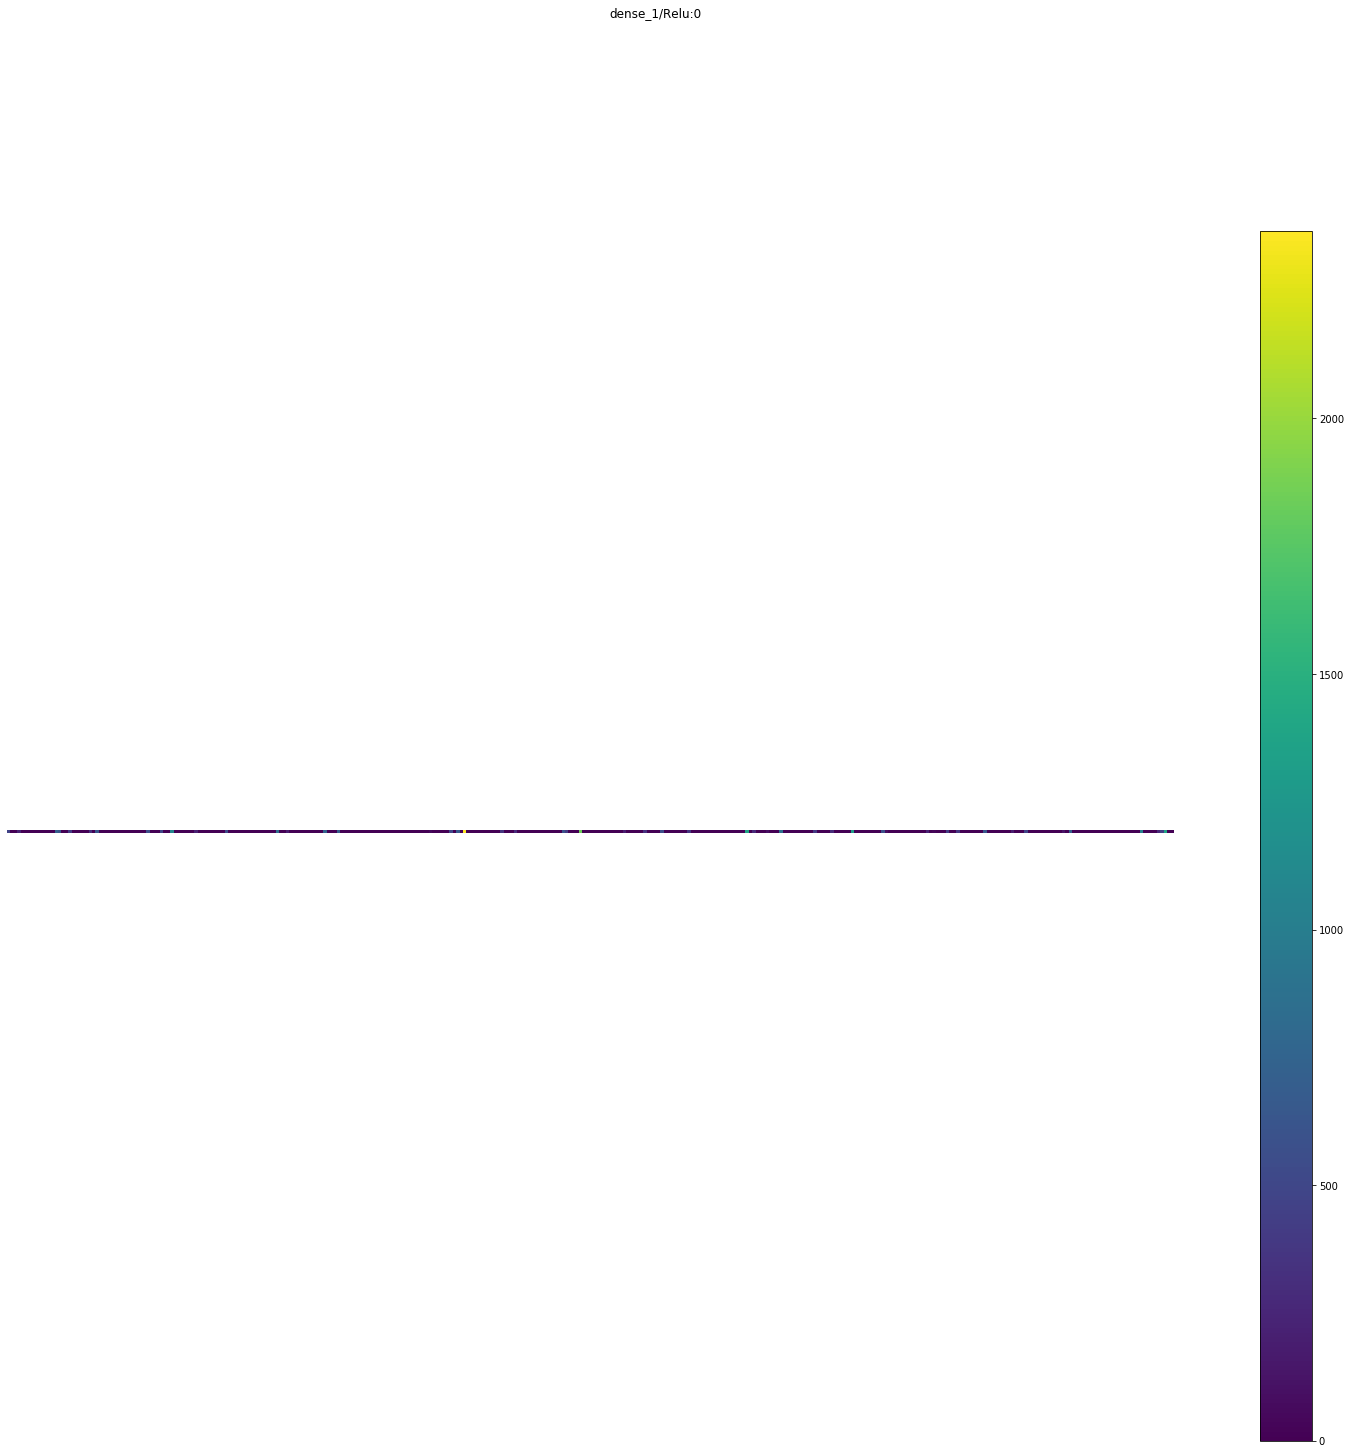

dense_2/Relu:0 (1, 171) 


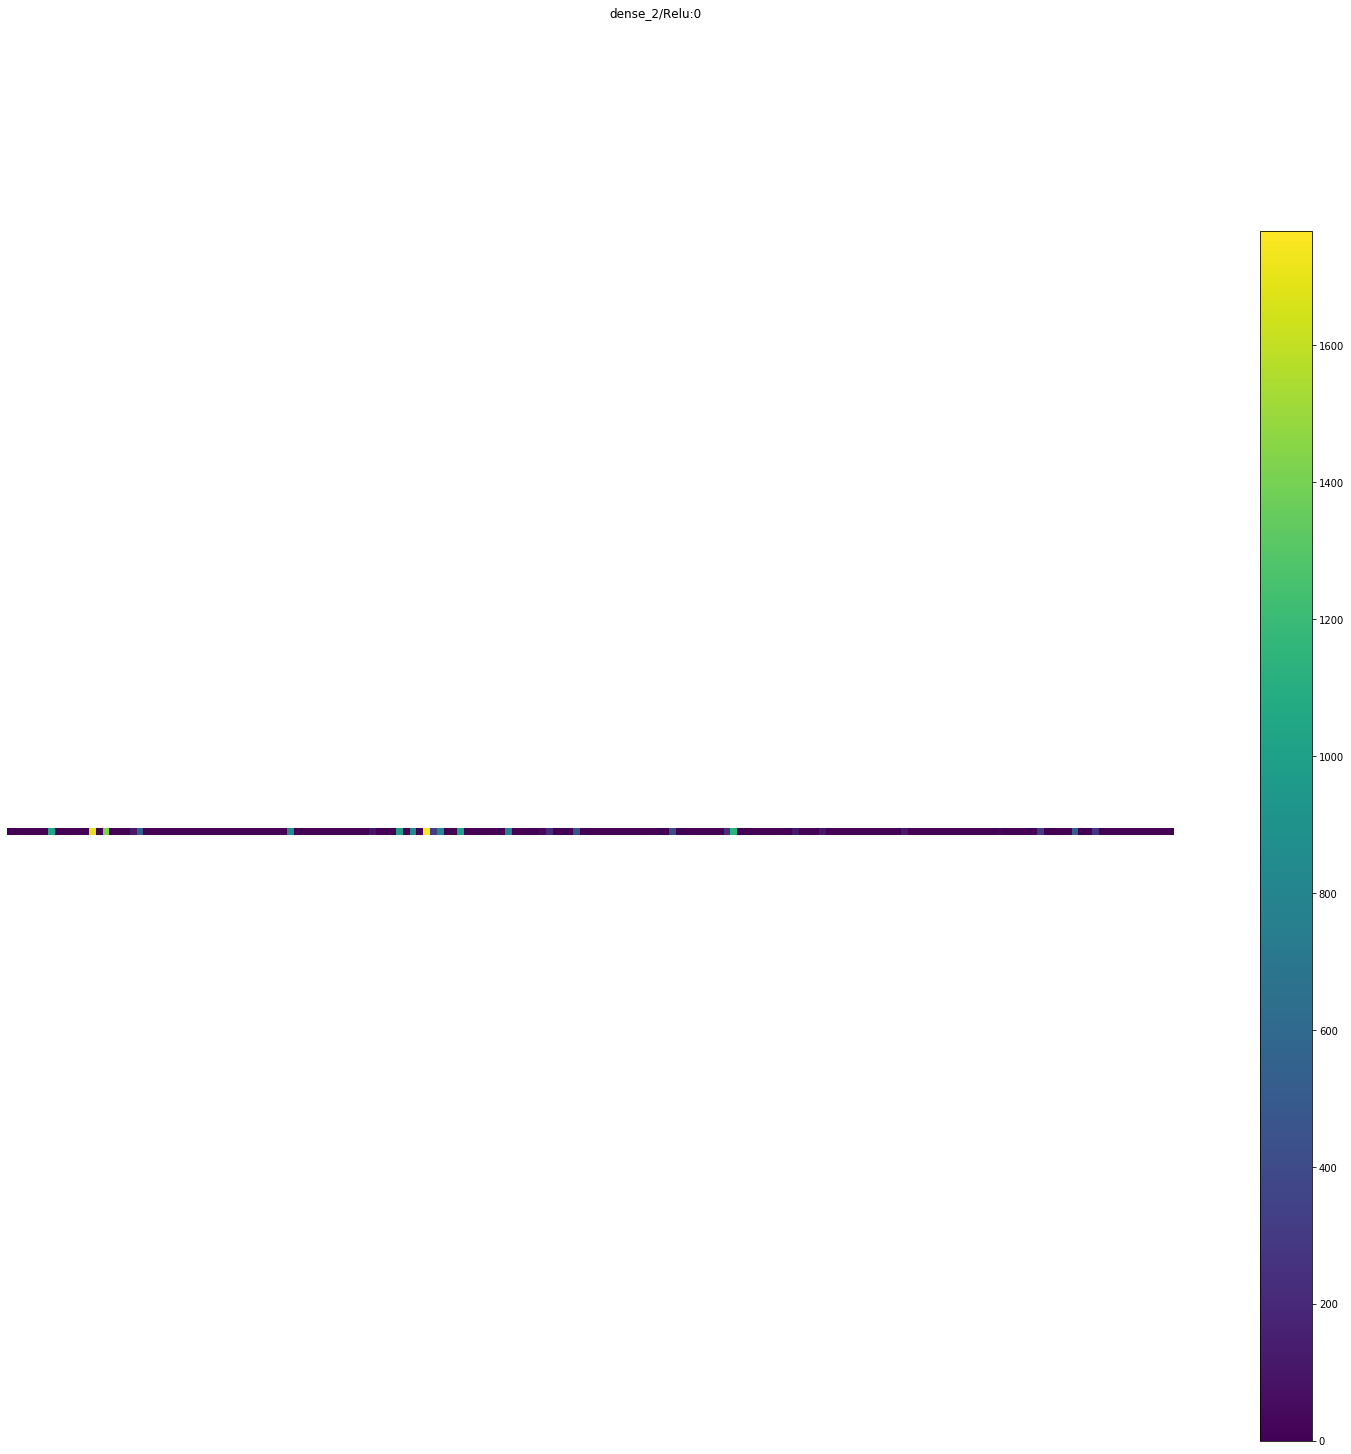

dense_3/Softmax:0 (1, 10) 


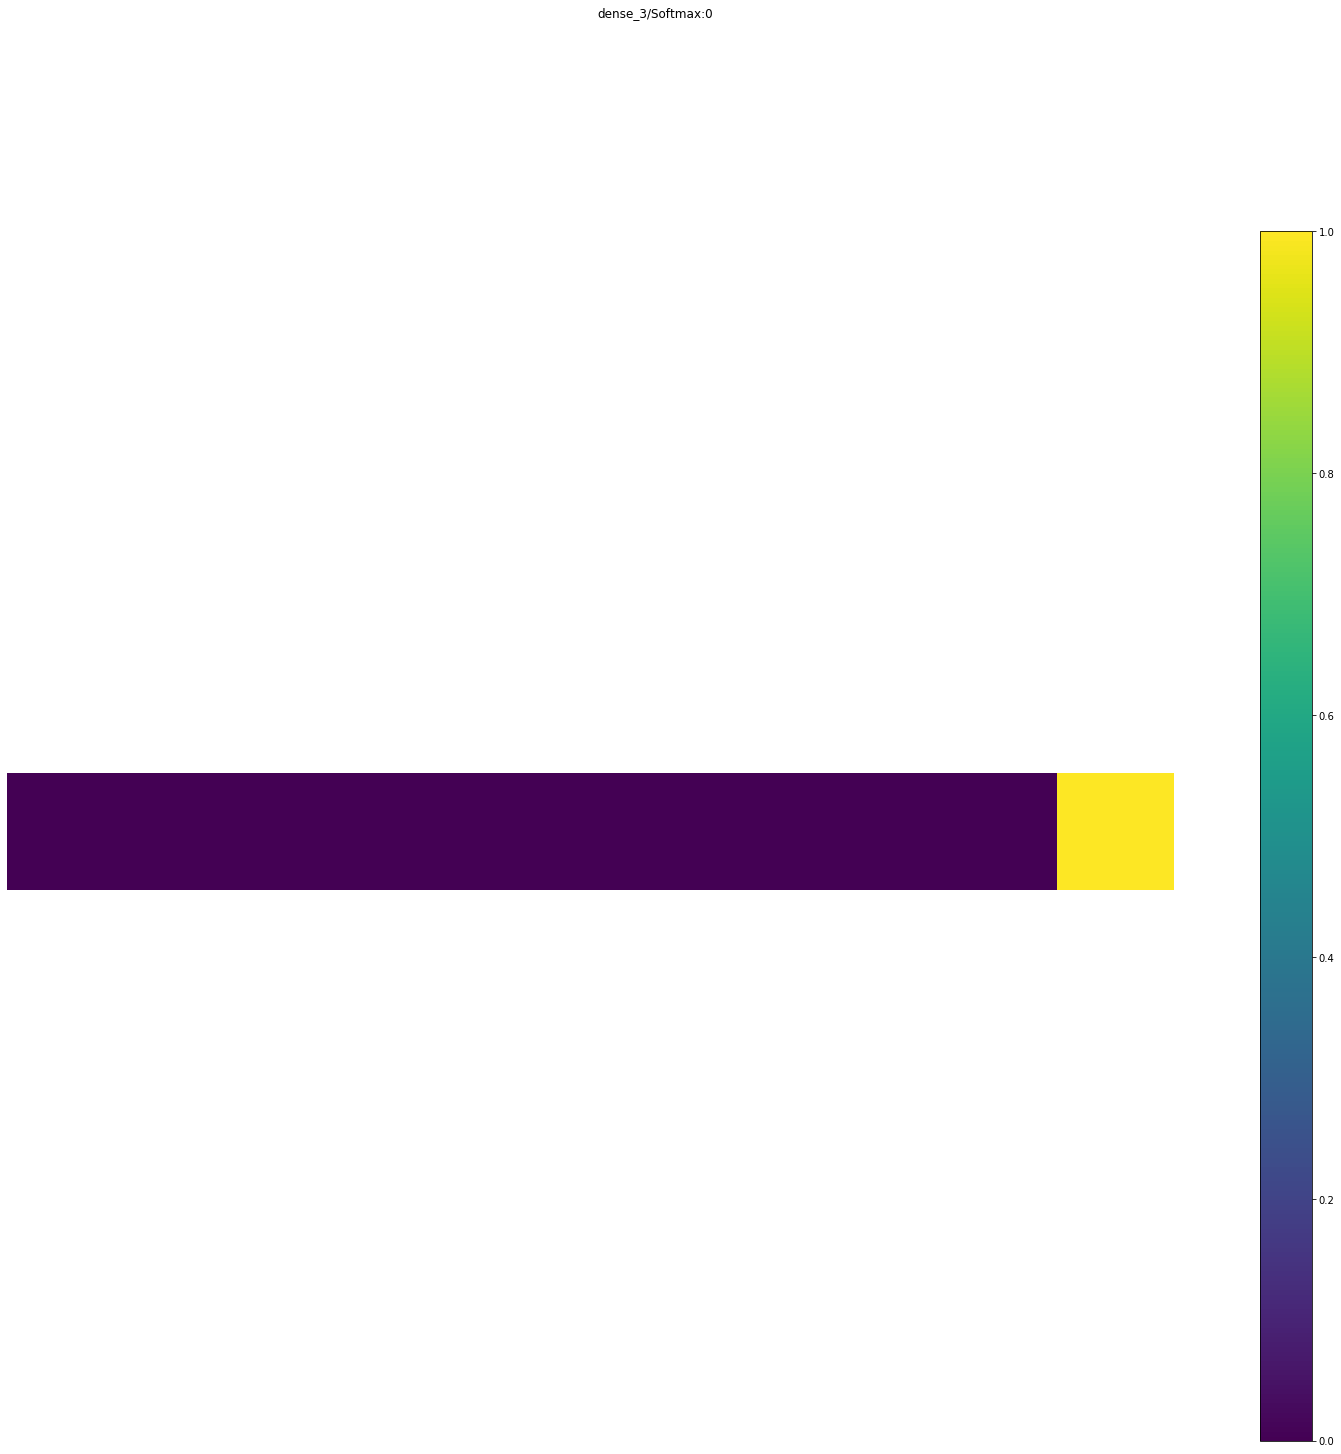

In [18]:
from keract import display_activations
display_activations(activations, save=False)

# Heat Maps Plotting

conv2d/BiasAdd:0 (1, 28, 28, 32) 
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


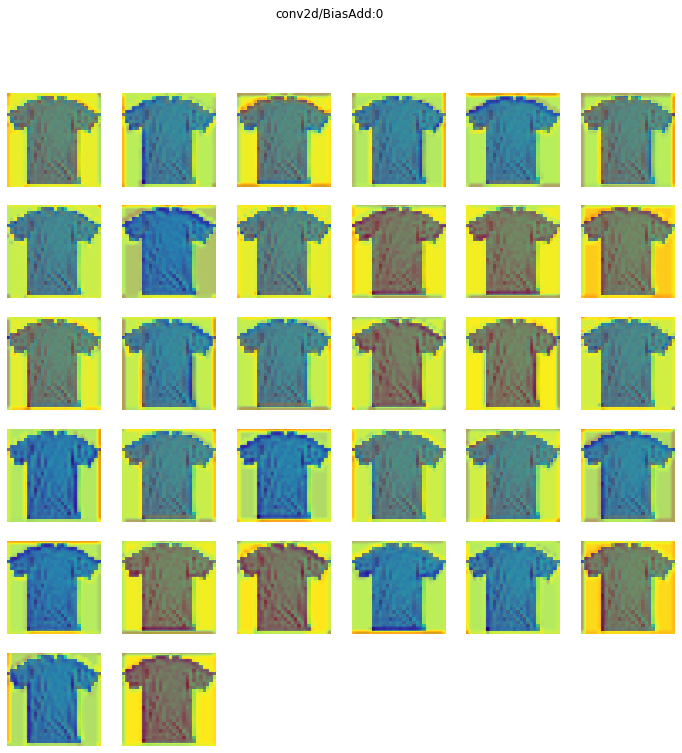

max_pooling2d/MaxPool:0 (1, 14, 14, 32) 
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


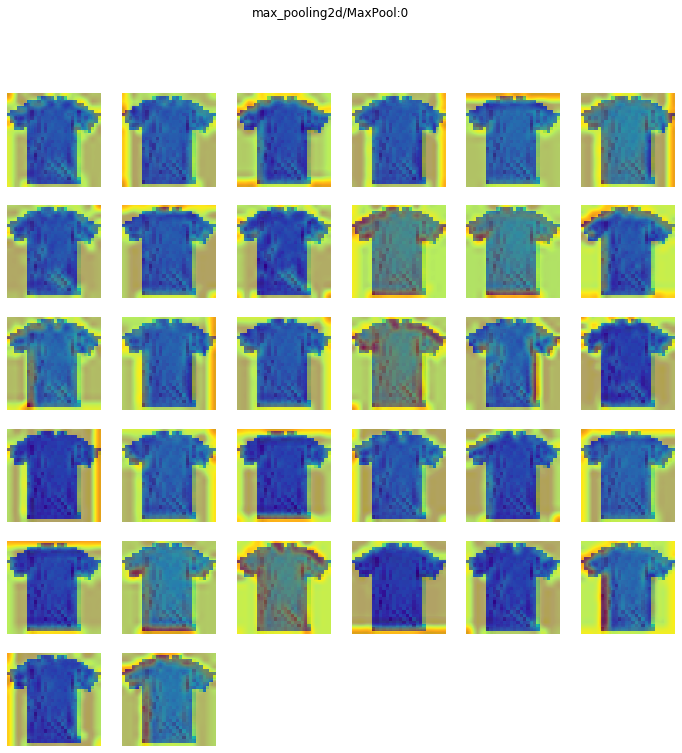

conv2d_1/BiasAdd:0 (1, 14, 14, 28) 
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


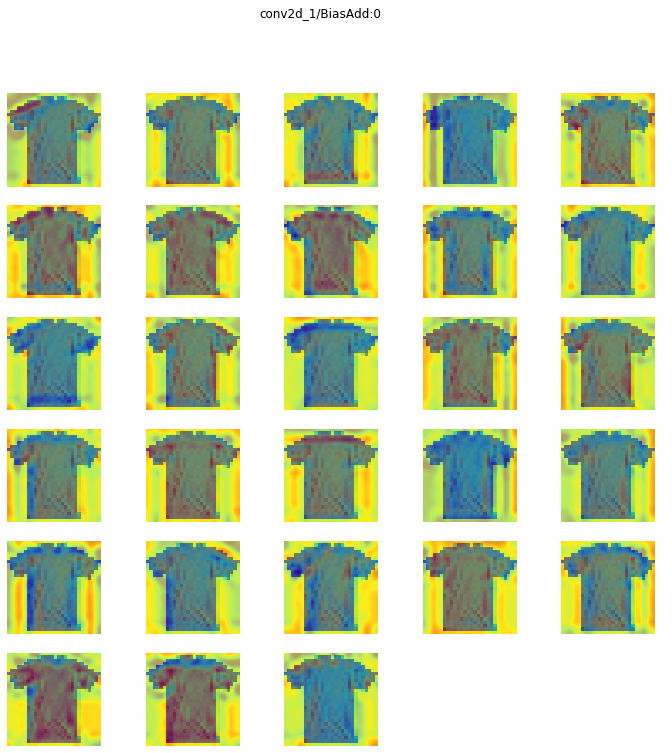

max_pooling2d_1/MaxPool:0 (1, 7, 7, 28) 
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)
(7, 7)


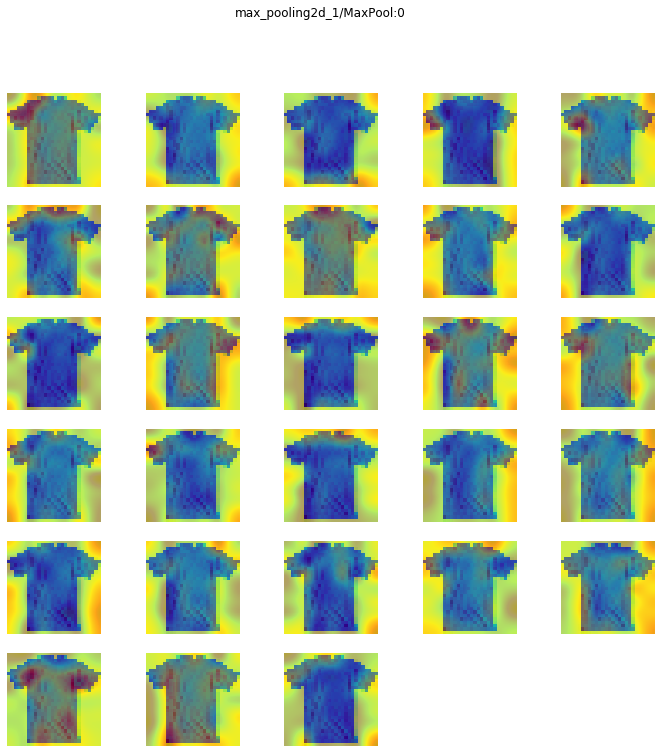

flatten/Reshape:0 (1, 1372) -> Skipped. 2D Activations.
dense/Relu:0 (1, 686) -> Skipped. 2D Activations.
dense_1/Relu:0 (1, 343) -> Skipped. 2D Activations.
dense_2/Relu:0 (1, 171) -> Skipped. 2D Activations.
dense_3/Softmax:0 (1, 10) -> Skipped. 2D Activations.


In [19]:
from keract import display_heatmaps
display_heatmaps(activations, new_image, save=False)

In [20]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_images[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')

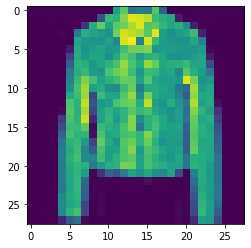

In [21]:
plt.imshow(test_images[10][:,:,0])

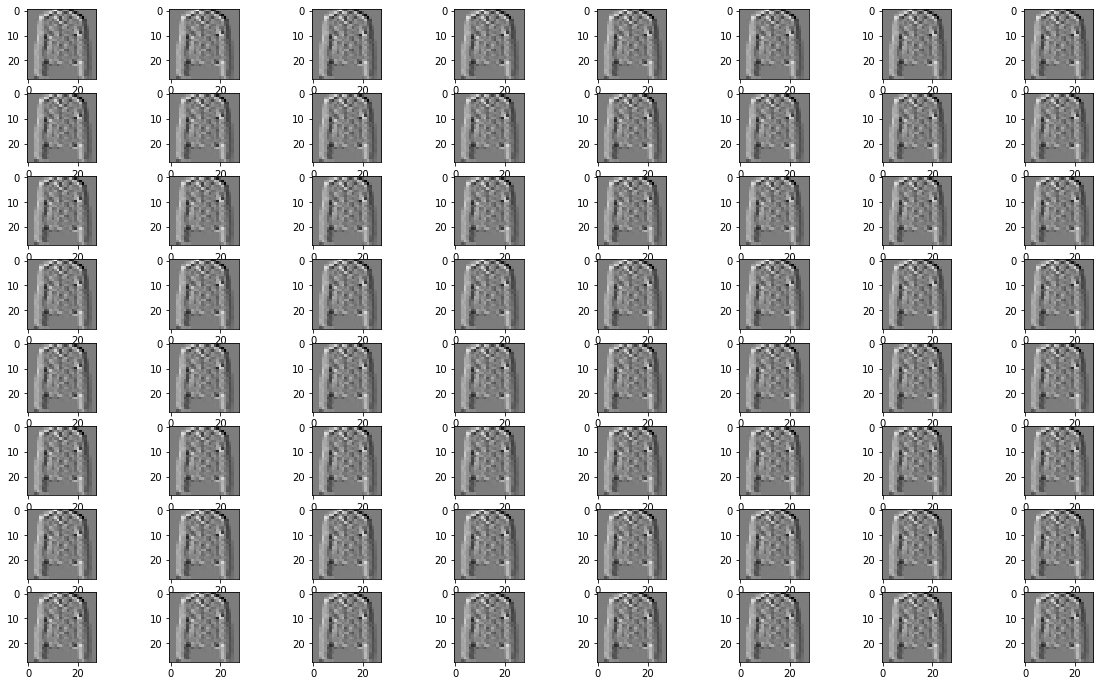

In [23]:
display_activation(activations, 8, 8, 0)

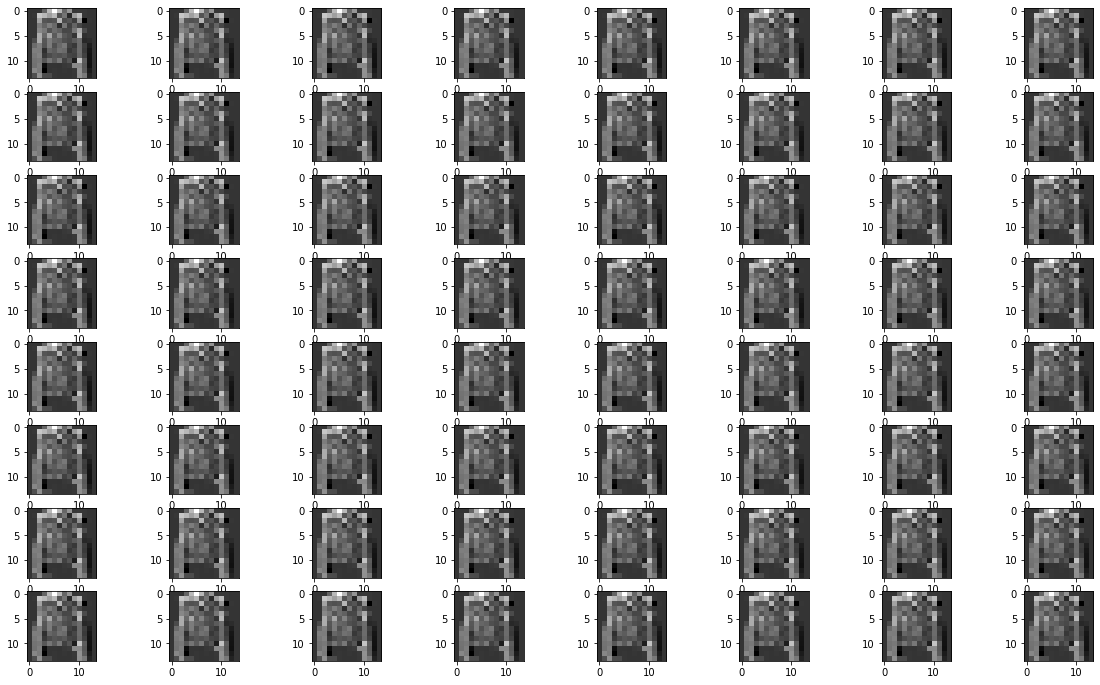

In [24]:
display_activation(activations, 8, 8, 1)

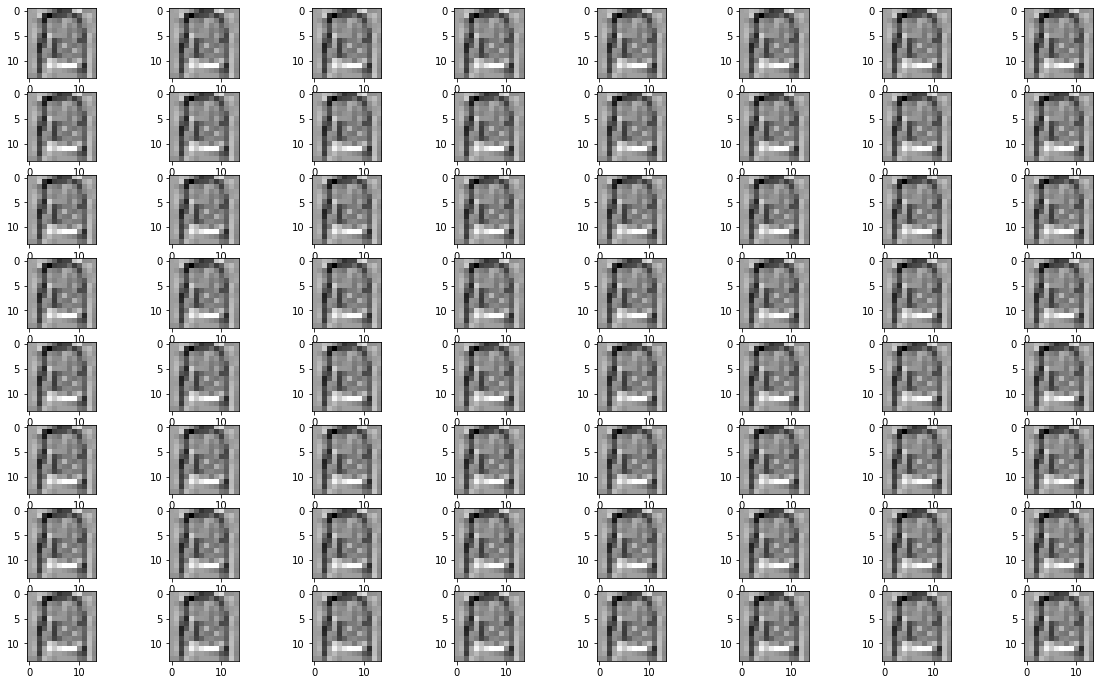

In [25]:
display_activation(activations, 8, 8, 2)

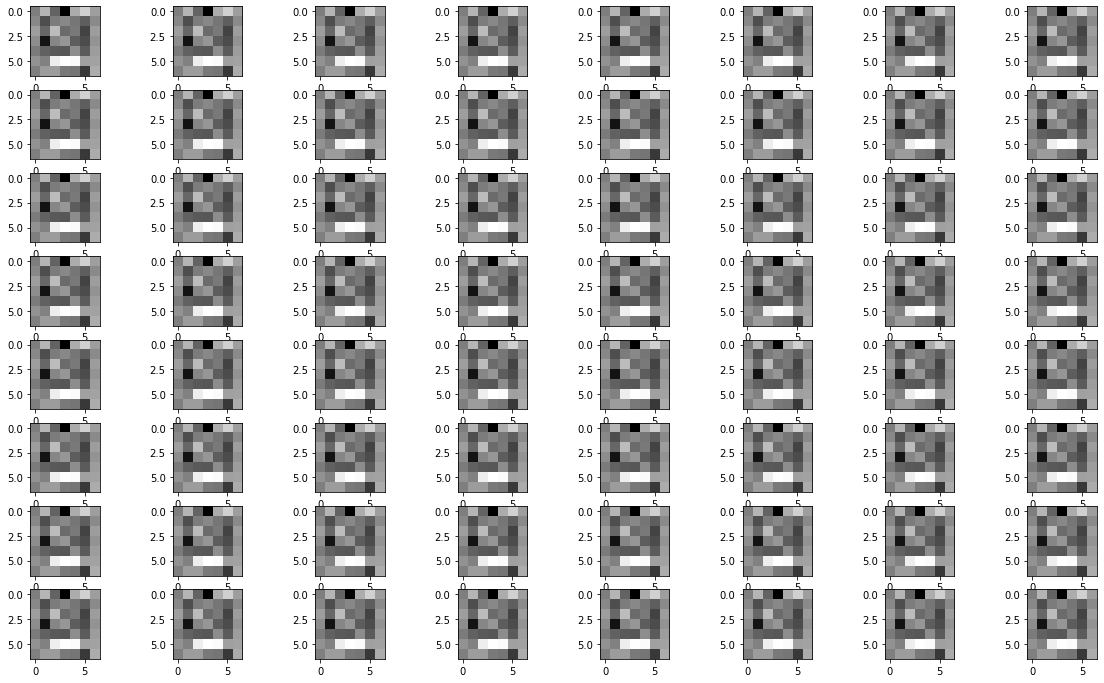

In [26]:
display_activation(activations, 8, 8, 3)

(1, 28, 28, 32)


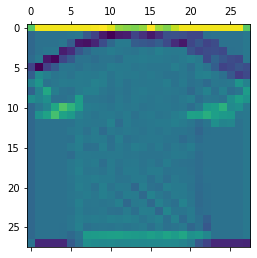

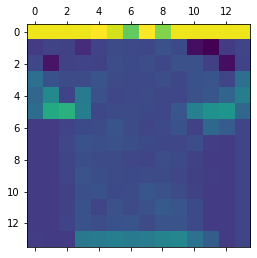

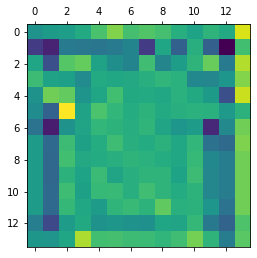

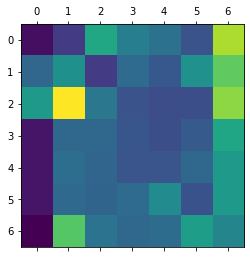

In [27]:
layer_outputs = [layer.output for layer in model.layers[:9]] # Extracts the outputs of the top 12 layers
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(new_image) # Returns a list of five Numpy arrays: one array per layer activation

first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.matshow(activations[1][0, :, :, 4], cmap='viridis')
plt.matshow(activations[2][0, :, :, 4], cmap='viridis')
plt.matshow(activations[3][0, :, :, 4], cmap='viridis')

In [29]:
layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

images_per_row = 4

MemoryError: 

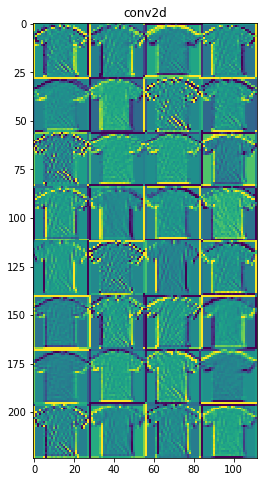

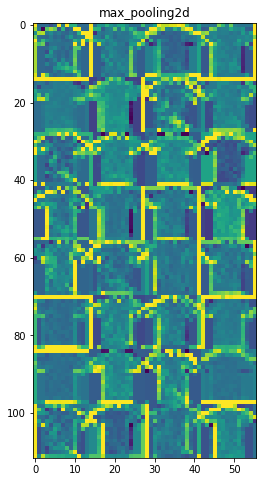

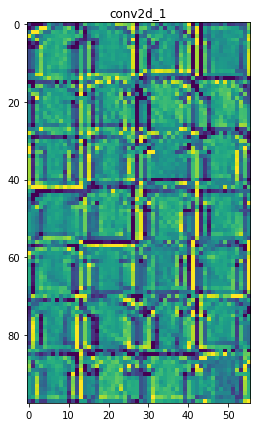

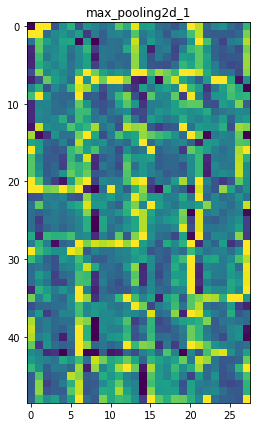

In [30]:
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Plotting filters of Conv layers

dense_3 (171, 10)


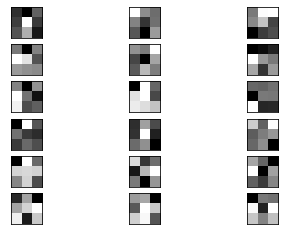

In [31]:
# Visualizing filter maps and feature maps   
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
    
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)


    

# retrieve weights from the second hidden layer
filters, biases = model.layers[2].get_weights()



# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)



# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()


In [32]:
len(filters)

3

In [33]:
np.shape(filters)

(3, 3, 32, 28)

In [47]:
ixs = [0, 1, 2, 3]
outputs = [model.layers[i].output for i in ixs]
model = tf.keras.models.Model(inputs=model.inputs, outputs=outputs)

In [48]:
feature_maps = model.predict(new_image)

In [77]:
np.shape(feature_maps[2])


(1, 14, 14, 32)

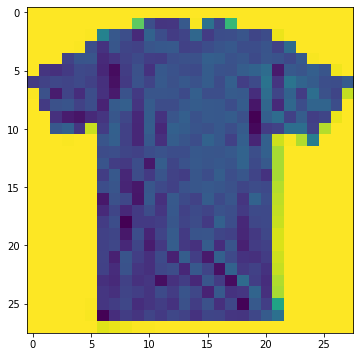

In [83]:
plt.imshow(np.reshape(feature_maps[0], (28, 28)))

# Feature Maps Plotting/ Activation Maps

In [93]:
act_fm = np.reshape(feature_maps[1], (28, 28, 32))


In [102]:
act_fm_new = np.reshape(act_fm, (32, 28, 28))

In [105]:
(act_fm_new[0])

array([[  83.232635  ,   28.414385  ,  -52.045734  ,  -64.29703   ,
          38.92253   ,  -65.92191   ,    8.256681  ,   59.42884   ,
           1.9827015 ,  -12.471642  ,   -6.496114  ,  -19.484125  ,
          -5.6093173 ,    4.1997995 ,  -13.726371  ,  -69.46652   ,
         -24.74254   ,   27.724924  ,   27.878054  ,  -41.68136   ,
          65.47764   ,   12.024903  ,  -38.745018  ,   66.89361   ,
         100.35696   ,  -50.012928  ,  -56.787746  ,  -26.149893  ],
       [ -17.784843  , -129.4485    ,   87.13269   , -150.77469   ,
           4.7749295 ,   -4.4348054 ,  -43.956043  ,   -6.3791065 ,
          68.70338   ,  -49.46594   ,    7.6430993 ,   41.430943  ,
          11.664479  ,  -53.693356  ,  -29.178509  ,   -4.221185  ,
         -12.367086  ,   26.102129  ,   19.65699   ,  -44.808735  ,
          -7.078423  ,   13.936644  ,    2.605449  ,   24.008524  ,
          59.287388  ,  -15.462472  ,  -18.53887   ,   39.25225   ],
       [ 114.53613   ,  -23.089323  ,  -31.042

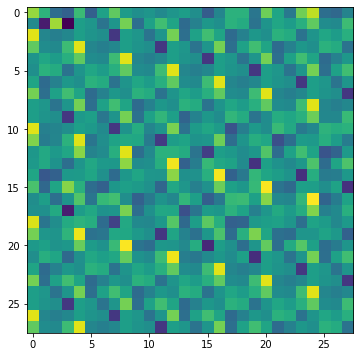

In [104]:
plt.imshow(act_fm_new[0])

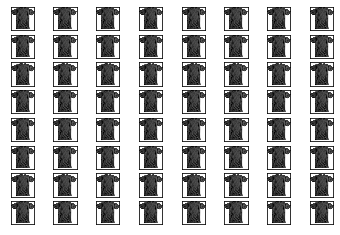

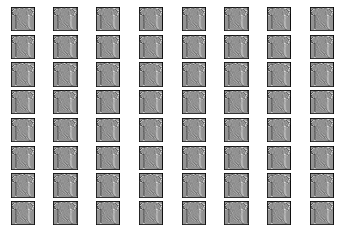

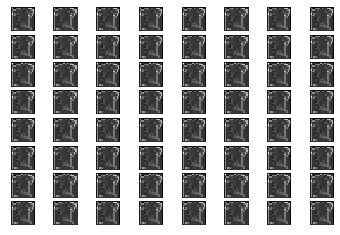

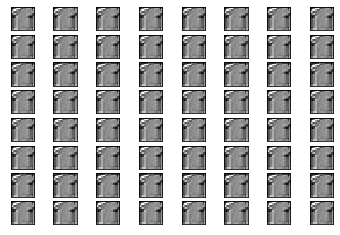

In [50]:

for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(8):
		for _ in range(8):
			# specify subplot and turn of axis
			ax = plt.subplot(8, 8, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, 0], cmap='gray')
			ix += 1
            
            
	# show the figure
	plt.show()

In [41]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_input (None, 28, 28, 1)
1 conv2d (None, 28, 28, 32)
3 conv2d_1 (None, 14, 14, 28)


In [42]:
model_new = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)

In [43]:
ixs = [0, 1, 2, 3]
outputs = [model.layers[i].output for i in ixs]

In [44]:
model_new1 = tf.keras.models.Model(inputs=model.inputs, outputs=outputs)

In [45]:
feature_maps = model_new1.predict(new_image)

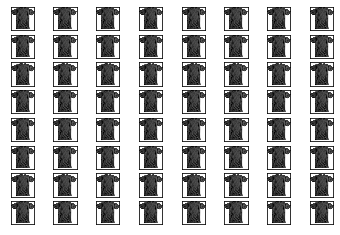

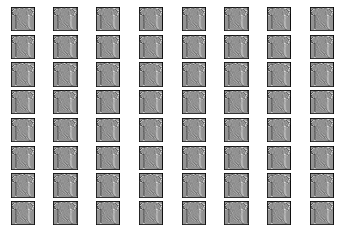

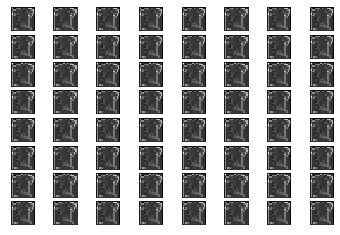

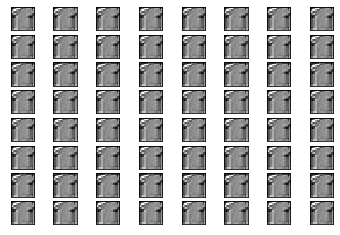

In [46]:
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
        
		for _ in range(square):
			# specify subplot and turn of axis
			ax = plt.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, 0], cmap='gray')
			ix += 1
	# show the figure
	plt.show()

#           Plotting Saliency Maps

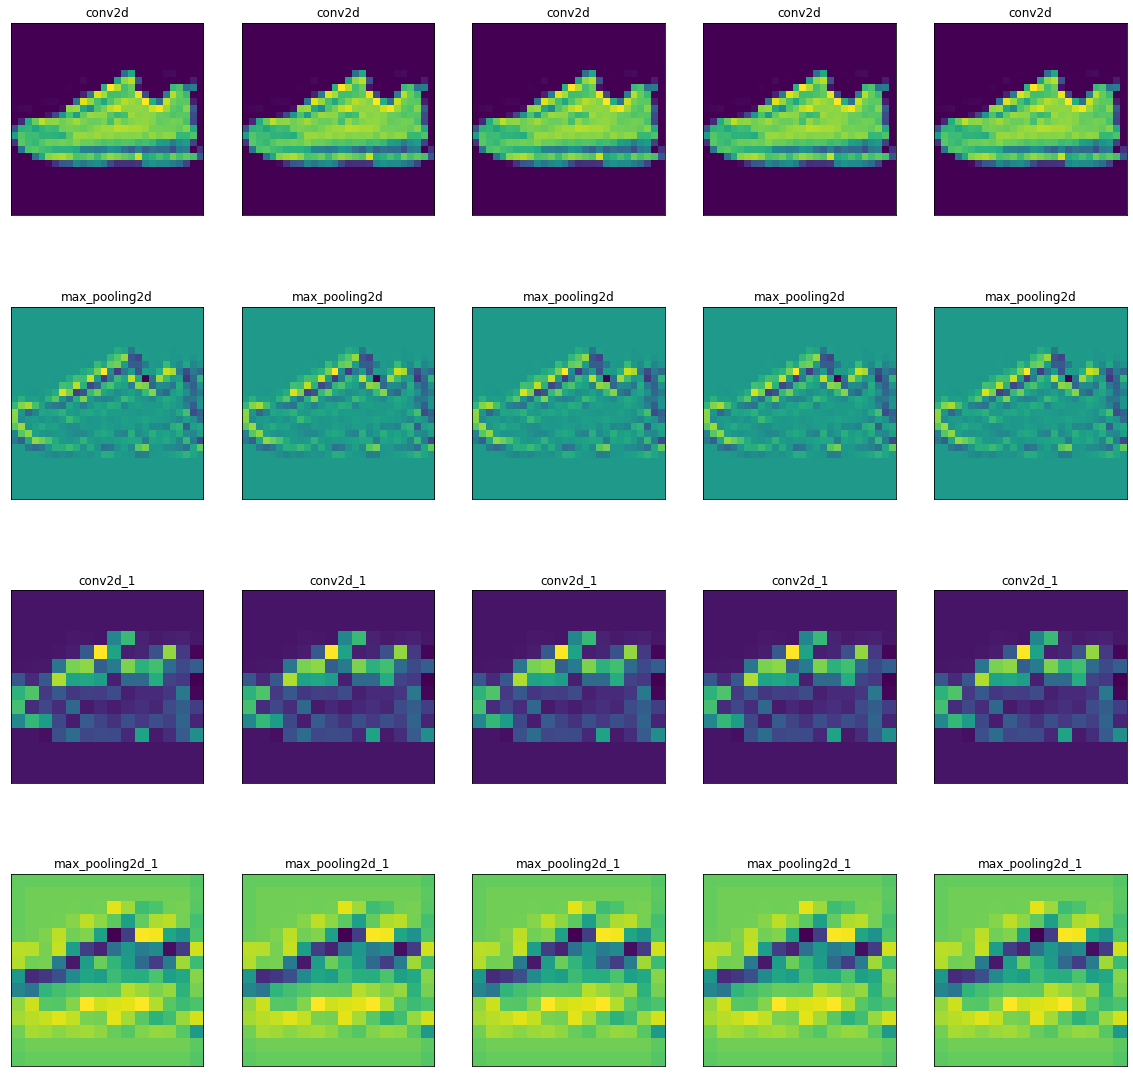

In [59]:

#defining names of layers from which we will take the output
layer_names = ['conv2d','max_pooling2d','conv2d_1','max_pooling2d_1']
outputs = []
image = test_images[8000][:,:,0]
image = image.reshape(1,28,28,1)
output1 = [layer.output for layer in model.layers] 
#extracting the output and appending to outputs
for i in range(0, len(layer_names)):
    intermediate_layer_model = tf.keras.Model(inputs=model.input,outputs=output1[i])
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)
#plotting the outputs
fig,ax = plt.subplots(nrows=4,ncols=5,figsize=(20,20))

for i in range(0,4):
    for z in range(0,5):
        ax[i][z].imshow(outputs[i][0,:,:,0])
        ax[i][z].set_title(layer_names[i])
        ax[i][z].set_xticks([])
        ax[i][z].set_yticks([])


In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
from keract import get_activations
activations = get_activations(model, new_image)


In [64]:
from keract import persist_to_json_file
persist_to_json_file(activations, 'C:/Soumick/Interpretability/load_activations.json')